<a href="https://colab.research.google.com/github/Nandini-Reddyy/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df = pd.read_csv('California_Housing.csv')

In [ ]:
data = df.join(pd.get_dummies(df.ocean_proximity).astype(int))

In [ ]:
pd.get_dummies(df.ocean_proximity).astype(int)

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]

In [ ]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0          0       0       0         1           0  
1          0       0       0         1           0  
2          0       0       0         1           0  
3          0       0       0         1           0  
4          0       0       0         1           0

In [ ]:
data.drop(columns = ['ocean_proximity'], inplace=True)

<ipython-input-93-4fa7a04f761c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='#FF5733', shade=True)


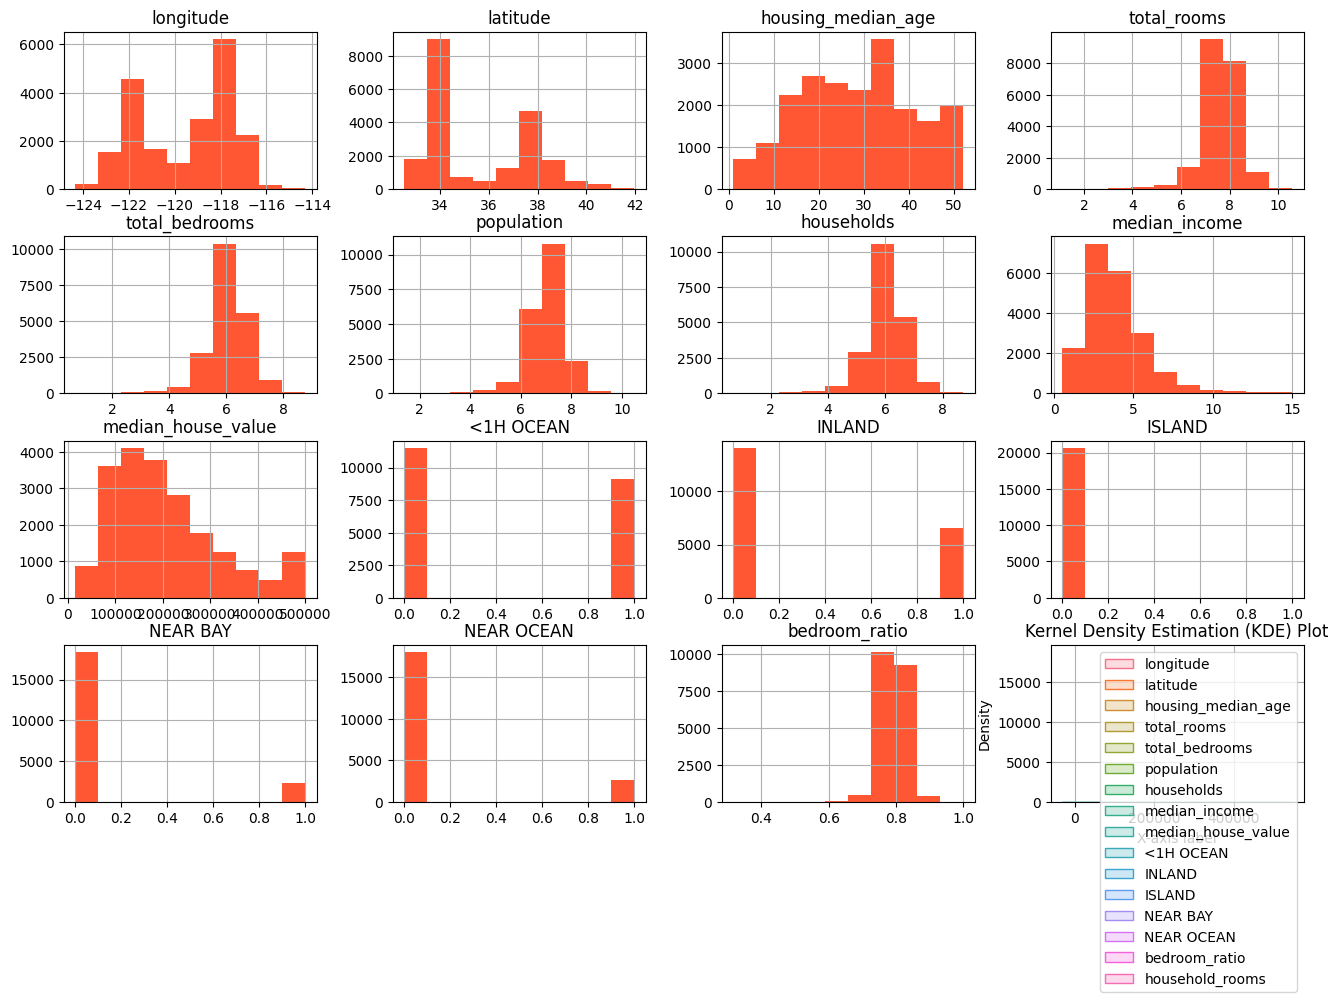

In [ ]:
data.hist(figsize=(16,10), color='#FF5733')
sns.kdeplot(data, color='#FF5733', shade=True)
plt.xlabel('X-axis label')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot')
plt.show()

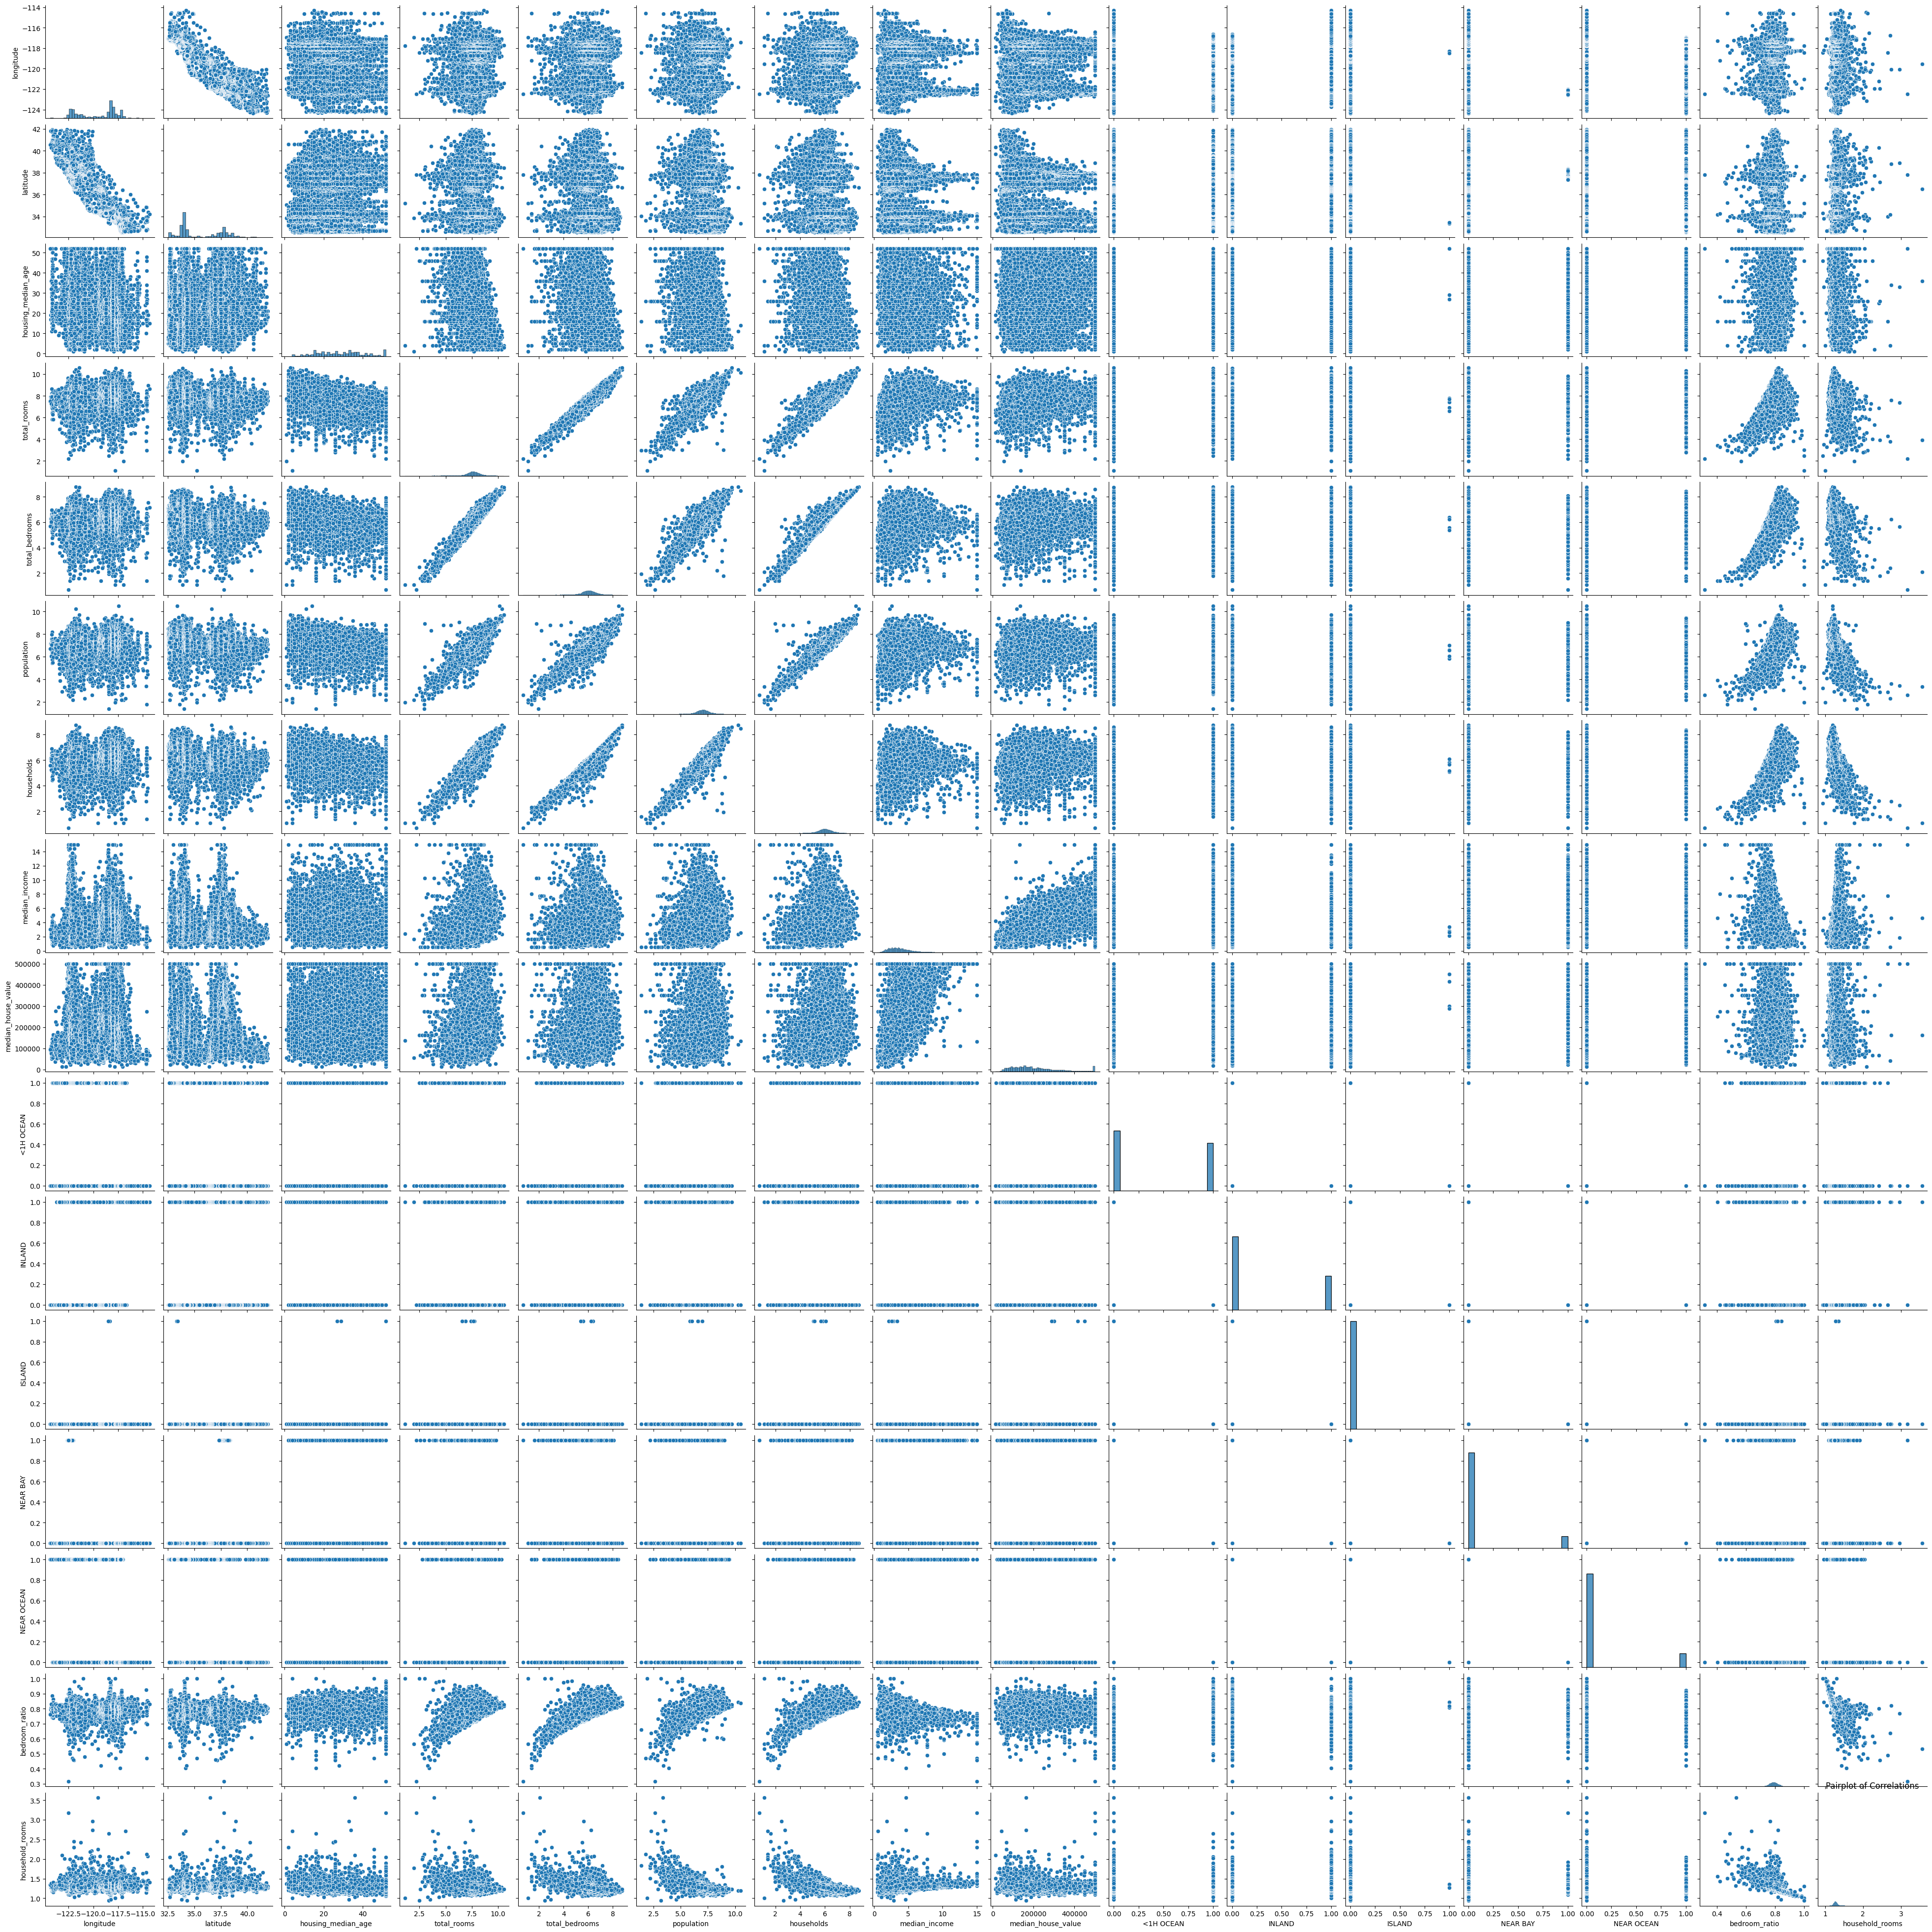

In [ ]:
sns.pairplot(data)
plt.title('Pairplot of Correlations')
plt.show()

In [ ]:
data['total_rooms'] = np.log(data['total_rooms']  + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms']  + 1)
data['population'] = np.log(data['population']  + 1)
data['households'] = np.log(data['households']  + 1)

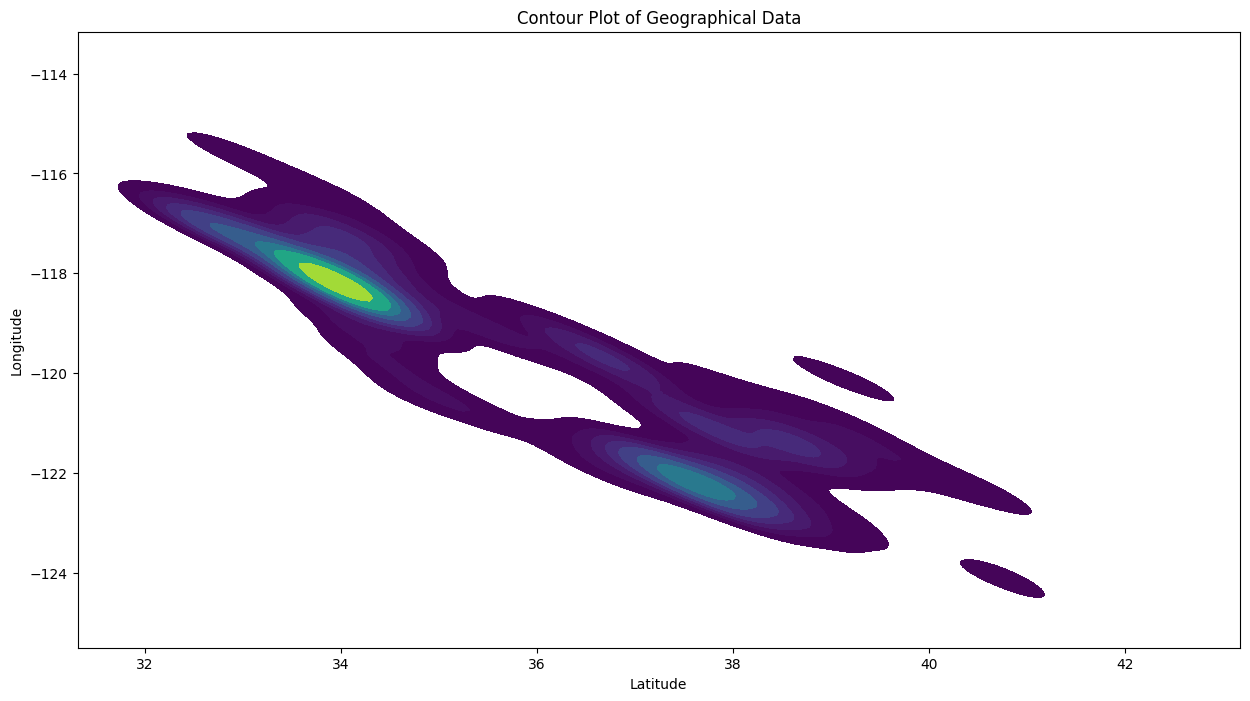

In [ ]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x=data['latitude'], y=data['longitude'], cmap='viridis', fill=True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Contour Plot of Geographical Data')
plt.show()

In [ ]:
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

<Figure size 1000x800 with 0 Axes>

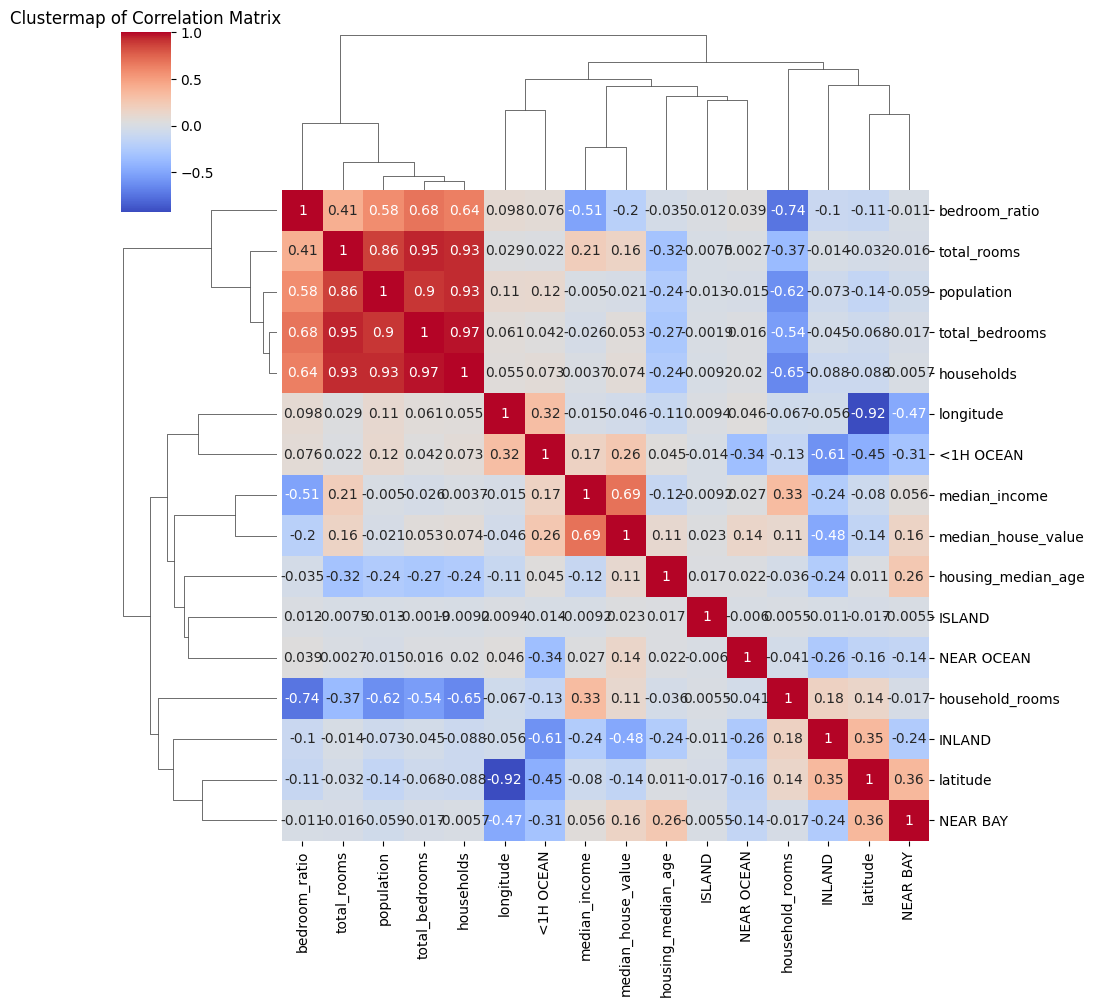

In [ ]:
plt.figure(figsize=(10, 8))
sns.clustermap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Clustermap of Correlation Matrix')
plt.show()

In [ ]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0     6.781058        4.867534   
1        -122.22     37.86                21.0     8.867850        7.009409   
2        -122.24     37.85                52.0     7.291656        5.252273   
3        -122.25     37.85                52.0     7.150701        5.463832   
4        -122.25     37.85                52.0     7.395108        5.638355   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     7.418181        5.926926   
20636    -121.21     39.49                18.0     6.548219        5.017280   
20637    -121.22     39.43                17.0     7.720905        6.186209   
20638    -121.32     39.43                18.0     7.528869        6.016157   
20639    -121.24     39.37                16.0     7.932362        6.424869   

       population  households  median_income  median_house_value  <1H OCEAN  \
0        5.777652    4.844187         8.3252            452600.0          0   
1        7.784057    7.037906         8.3014            358500.0          0   
2        6.208590    5.181784         7.2574            352100.0          0   
3        6.326149    5.393628         5.6431            341300.0          0   
4        6.338594    5.560682         3.8462            342200.0          0   
...           ...         ...            ...                 ...        ...   
20635    6.740519    5.802118         1.5603             78100.0          0   
20636    5.877736    4.744932         2.5568             77100.0          0   
20637    6.915723    6.073045         1.7000             92300.0          0   
20638    6.609349    5.857933         1.8672             84700.0          0   
20639    7.235619    6.274762         2.3886             89400.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
0           0       0         1           0       0.717813         1.399834  
1           0       0         1           0       0.790429         1.260013  
2           0       0         1           0       0.720313         1.407171  
3           0       0         1           0       0.764097         1.325768  
4           0       0         1           0       0.762444         1.329892  
...       ...     ...       ...         ...            ...              ...  
20635       1       0         0           0       0.798973         1.278530  
20636       1       0         0           0       0.766205         1.380045  
20637       1       0         0           0       0.801228         1.271340  
20638       1       0         0           0       0.799078         1.285243  
20639       1       0         0           0       0.809957         1.264169  

[20640 rows x 16 columns]

In [ ]:
from sklearn.model_selection import train_test_split
x= data.drop(['median_house_value'], axis =1)
y = data['median_house_value']
x_train,x_test, y_train, y_test =  train_test_split(X,Y, test_size=0.3, random_state = 2023)

In [ ]:
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])

In [ ]:
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    tf.keras.layers.Dropout(0.6),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
179/179 [==============================] - 1s 3ms/step - loss: 55147925504.0000 - mae: 204287.1875 - val_loss: 47986569216.0000 - val_mae: 188008.6406
Epoch 2/10
179/179 [==============================] - 0s 2ms/step - loss: 31860924416.0000 - mae: 140968.6719 - val_loss: 13255936000.0000 - val_mae: 80745.4297
Epoch 3/10
179/179 [==============================] - 0s 3ms/step - loss: 9086375936.0000 - mae: 69419.7812 - val_loss: 5941837312.0000 - val_mae: 58374.2812
Epoch 4/10
179/179 [==============================] - 0s 2ms/step - loss: 6743805952.0000 - mae: 61492.5508 - val_loss: 5140685824.0000 - val_mae: 53300.8984
Epoch 5/10
179/179 [==============================] - 0s 3ms/step - loss: 6335341056.0000 - mae: 58516.6562 - val_loss: 4866718208.0000 - val_mae: 51024.2617
Epoch 6/10
179/179 [==============================] - 0s 2ms/step - loss: 6151079936.0000 - mae: 57221.8750 - val_loss: 4765731328.0000 - val_mae: 49865.6133
Epoch 7/10
179/179 [=========================

In [ ]:
y_pred = model.predict(x_test)

192/192 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_abs = mean_absolute_error(y_test, y_pred)
mean_sq = mean_squared_error(y_test, y_pred)
root_mean = np.sqrt(mse)
print(f'Mean Absolute Error: {mean_abs}')
print(f'Mean Squared Error: {mean_sq}')
print(f'Root Mean Squared Error: {root_mean}')

Mean Absolute Error: 48454.10712189667
Mean Squared Error: 4616153286.532599
Root Mean Squared Error: 68089.05450743326


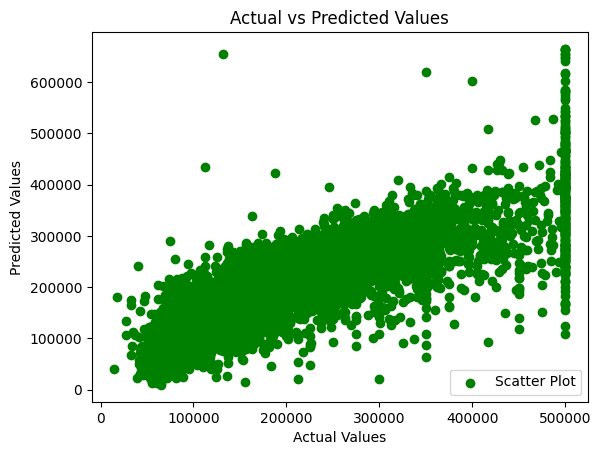

In [ ]:
plt.scatter(y_test, y_pred, alpha=1, label='Scatter Plot', color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
